# [DRAFT] Viscoelasticity


**This is really cool. There's a simple entirely boundary integral equation for layered viscoelasticity. I started working through the math thinking that I'd need to handle a volumetric term, but then I realized that the volumetric term reduces to just a boundary integral for the special case of layered viscoelasticity.**

## A layered viscoelastic PDE
Let's start from the constitutive equation for linear elasticity and the constitutive equation for a Maxwell rheology, both in antiplane strain:

\begin{align}
\textrm{Elastic:  }~~ \vec{\sigma} &= 2\mu\vec{\epsilon}\\
\textrm{Maxwell:  }~~ \dot{\vec{\sigma}} &= 2\mu\dot{\vec{\epsilon}} - \frac{\mu}{\eta}\vec{\sigma}
\end{align}

where $\vec{\sigma} = (\sigma_{xz}, \sigma_{yz})$ is the vector stress in the antiplane setting, $\mu$ is the shear modulus and $\eta$ is the viscosity.

We'll add the definition of strain, again in the antiplane setting:
\begin{equation}
\vec{\epsilon} = \frac{1}{2}\nabla u
\end{equation}

And Newton's law in the absence of body forces:
\begin{equation}
\nabla \cdot \vec{\sigma} = 0
\end{equation}

So, that for an elastic rheology, the result simplifies to the Laplace equation (or Poisson equation with zero right hand side):
\begin{align}
\nabla \cdot (2\mu \vec{\epsilon}) &= 0 \\
\nabla^2 u &= 0
\end{align}

The result is a bit more complex for a Maxwell rheology. Ultimately though, we can still re-arrange the terms to make the result look like a Poisson equation with a funny looking right-hand-side. Inserting the Maxwell rheology equation into the time derivative of Newton's law:
\begin{align}
\nabla \cdot (2\mu\dot{\vec{\epsilon}} - \frac{\mu}{\eta}\vec{\sigma}) = 0\\
\nabla^2 \dot{u} = \nabla \cdot (\frac{1}{\eta}\vec{\sigma})
\end{align}

Let's explore that right hand side a bit more because the stress divergence component is going to drop out because the divergence of stress is zero.
\begin{align}
\nabla \cdot (\frac{1}{\eta}\vec{\sigma}) &= \nabla (\frac{1}{\eta}) \cdot \vec{\sigma} + \frac{1}{\eta} (\nabla \cdot \vec{\sigma})\\
&= \nabla (\frac{1}{\eta}) \cdot \vec{\sigma}
\end{align}

Now consider the figure below, a classic layered Maxwell viscoelastic half space where $\mu$ is constant and $\eta$ varies only as a step function across the elastic/viscoelastic boundary. As a result, the term that includes a viscosity divergence will simplify to:
\begin{equation}
\nabla (\frac{1}{\eta}) = (0, -\delta(y=D) \frac{1}{\eta_V})
\end{equation}

The negative is because inverse viscosity decreases in the positive y direction. 

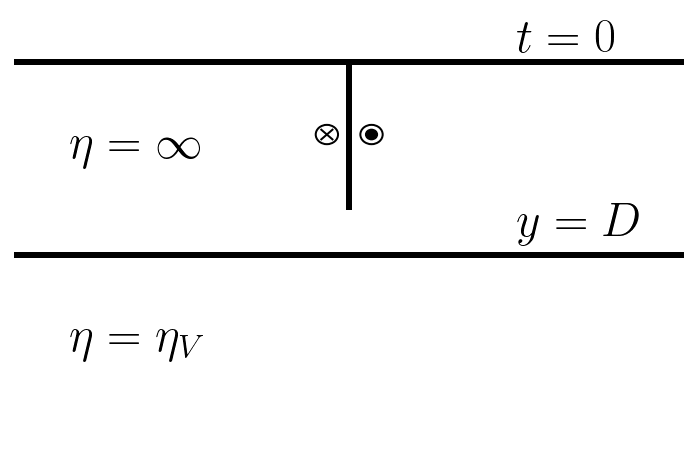

In [86]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format='retina'

x = np.linspace(-1, 1, 100)
plt.plot(3*x, 0*x, 'k-')
plt.plot(3*x, -2 + 0*x, 'k-')
plt.plot(0*x, -0.75 + 0.75 * x, 'k-')
plt.text(-2.5, -1, '$\\eta = \\infty$', fontsize=24)
plt.text(-2.5, -3, '$\\eta = \\eta_V$', fontsize=24)
plt.text(1.5, 0.1, '$t = 0$', fontsize=24)
plt.text(1.5, -1.8, '$y = D$', fontsize=24)


plt.gca().add_patch(plt.Circle((0.2, -0.75), 0.10, color='k', fill=False))
plt.gca().add_patch(plt.Circle((0.2, -0.75), 0.05, color='k', fill=True))
plt.gca().add_patch(plt.Circle((-0.2, -0.75), 0.10, color='k', fill=False))
plt.plot([-0.25,-0.15], [-0.8,-0.7], 'k-', linewidth=1)
plt.plot([-0.15,-0.25], [-0.8,-0.7], 'k-', linewidth=1)

plt.xlim([-3, 3])
plt.ylim([-4, 0.5])
plt.axis('off')
plt.savefig('layered_ve.pdf')
plt.show()

So, the final equation we'd like to solve is:
\begin{equation}
\nabla^2 \frac{\partial u}{\partial t} = -\delta(y=D) \frac{1}{\eta_V} \sigma_y
\end{equation}

In some situations, it can be more convenient to consider the equation in terms of the displacement rather than the velocity:
\begin{equation}
\nabla^2 u = -\delta(y=D) \frac{1}{\eta_V} \int_{0}^{T} \sigma_y dt
\end{equation}

## Viscoelastic boundary integral equation

Now, we'll transform the above equation into integral form. First, remember from the previous section that, when solving for the displacement resulting from a antiplane strike slip fault within a half space, the integral form was:

\begin{equation}
u(\mathbf{p}) = -\int_{H} \frac{\partial G}{\partial n_q}(\mathbf{p}, \mathbf{q}) u(\mathbf{q}) d\mathbf{q} -\int_{F} \frac{\partial G}{\partial n_q}(\mathbf{p}, \mathbf{q}) s(\mathbf{q}) d\mathbf{q}
\end{equation}
where $\mathbf{p}$ is the observation point, $u$ is the displacement, $s$ is the slip on the fault, $H$ is the free surface, $F$ is the fault surface and $\frac{\partial G}{\partial n_q}$ is the kernel of the double layer potential. 

To extend this to a setting with a body force term, we can add a volume integral term:
\begin{equation}
u(\mathbf{p}) = -\int_{H} \frac{\partial G}{\partial n_q}(\mathbf{p}, \mathbf{q}) u(\mathbf{q}) d\mathbf{q} -\int_{F} \frac{\partial G}{\partial n_q}(\mathbf{p}, \mathbf{q}) s(\mathbf{q}) d\mathbf{q} + \int_{V} G(\mathbf{p},\mathbf{q}) f(\mathbf{q}) d\mathbf{q}
\end{equation}

Now, substituting in the body force from above for $f(\mathbf{q})$, the fascinating thing is that the delta function means that the volume integral will reduce to a surface integral over the surface $B$ that defines the boundary between the viscoelastic region and the elastic region.
\begin{equation}
\int_{V} G(\mathbf{p},\mathbf{q}) f(\mathbf{q}) d\mathbf{q} = -\frac{1}{\eta_V} \int_{B} G(\mathbf{p}, \mathbf{q}) \bigg[ \int_0^T \sigma_y(\mathbf{q}) dt \bigg] d\mathbf{q}
\end{equation}

So, the result is a purely boundary integral equation for the behavior of a fault in a viscoelastic and elastic layered space. 

\begin{equation}
u(\mathbf{p}) = -\int_{H} \frac{\partial G}{\partial n_q}(\mathbf{p}, \mathbf{q}) u(\mathbf{q}) d\mathbf{q} -\int_{F} \frac{\partial G}{\partial n_q}(\mathbf{p}, \mathbf{q}) s(\mathbf{q}) d\mathbf{q} -\frac{1}{\eta_V} \int_{B} G(\mathbf{p}, \mathbf{q}) \bigg[ \int_0^T \sigma_y(\mathbf{q}) dt \bigg] d\mathbf{q}
\end{equation}

Assign $S$ as the stress integral:

\begin{equation}
S(\mathbf{q}) = \int_0^T \sigma_y(\mathbf{q}) dt$
\end{equation}

This integral equation results in a fairly simple time stepping algorithm where we:
1. Solve for $\frac{\partial S(\mathbf{q})}{\partial t} = \sigma_y(\mathbf{q})$
2. Update $S$ according to the time integral.
3. Solve the BIE for $u$.
4. Repeat

# Scratch below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import common

%config InlineBackend.figure_format='retina'

In [2]:
import sympy as sp

In [20]:
fault_depth = 0.5
def fault_fnc(q):
    return 0*q, q - 1 - fault_depth, -np.ones_like(q), 0*q, np.ones_like(q)

In [27]:
surf_L = 10
def flat_fnc(q):
    return surf_L*q, 0*q, 0*q, np.ones_like(q), np.full_like(q, surf_L)

In [28]:
def slip_fnc(xhat):
    # This must be zero at the endpoints!
    return np.where(
        xhat < -0.9, 
        (1.0 + xhat) * 10,
        np.where(xhat < 0.9, 
                 1.0,
                 (1.0 - xhat) * 10
                )
    )

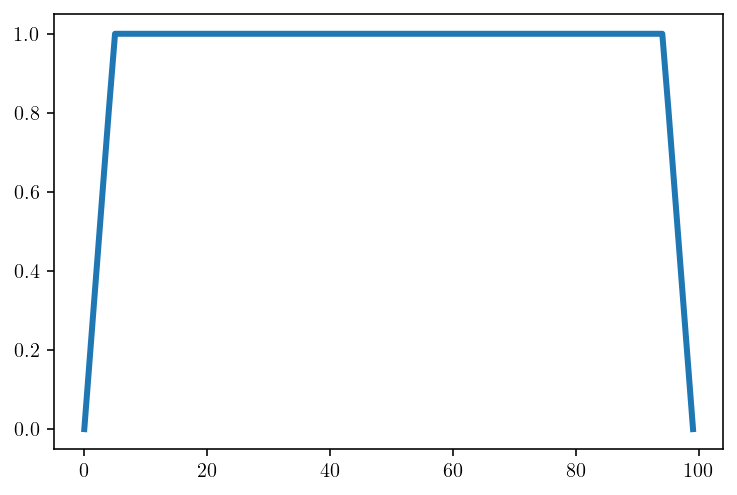

In [29]:
plt.plot(slip_fnc(np.linspace(-1, 1, 100)))

In [30]:
qr_fault = common.gauss_rule(50)
fault = fault_fnc(qr_fault[0])

In [31]:
qr_flat = common.gauss_rule(2500)
flat = flat_fnc(qr_flat[0])

In [32]:
qbx_p = 5
qbx_center_x, qbx_center_y, qbx_r = common.qbx_choose_centers(flat, qr_flat)
qbx_expand_flat = common.qbx_expand_matrix(common.double_layer_matrix, flat, qr_flat, qbx_center_x, qbx_center_y, qbx_r, qbx_p=qbx_p)[:,0,:]
qbx_eval_flat = common.qbx_eval_matrix(flat[0][None,:], flat[1][None,:], qbx_center_x, qbx_center_y, qbx_p=qbx_p)[0]
A = np.real(np.sum(qbx_eval_flat[:,:,None] * qbx_expand_flat, axis=1))

In [33]:
B = common.double_layer_matrix(fault, qr_fault, flat[0], flat[1])
slip = slip_fnc(qr_fault[0])
v = B.dot(slip)

In [34]:
surf_disp = np.linalg.solve(A - 0.5 * np.eye(A.shape[0]), v)

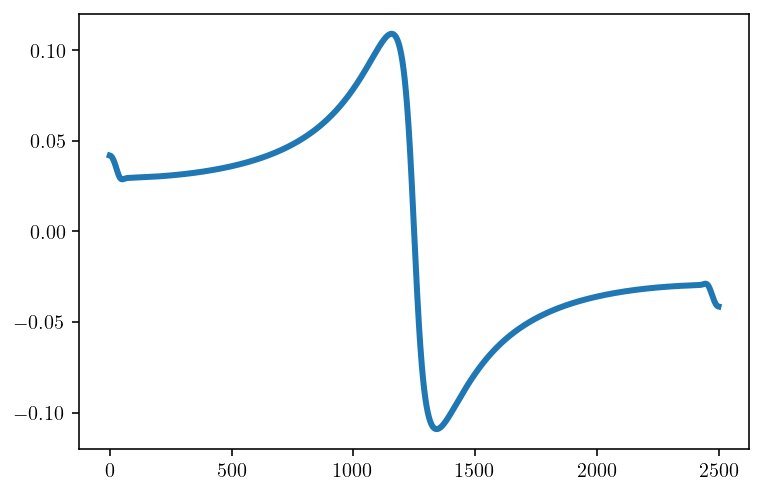

In [35]:
plt.plot(surf_disp)
plt.show()

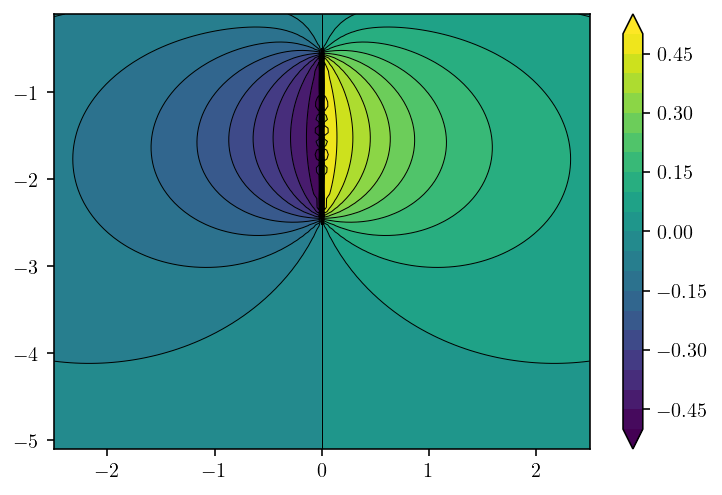

In [36]:
nobs = 100
zoomx = [-2.5, 2.5]
zoomy = [-5.1, -0.1]
# zoomx = [-25, 25]
# zoomy = [-45, 5]
xs = np.linspace(*zoomx, nobs)
ys = np.linspace(*zoomy, nobs)
obsx, obsy = np.meshgrid(xs, ys)

disp_flat = common.double_layer_matrix(
    surface   = flat,
    obsx      = obsx.flatten(), 
    obsy      = obsy.flatten(),
    quad_rule = qr_flat
).dot(surf_disp).reshape(obsx.shape)
disp_fault = common.double_layer_matrix(
    surface   = fault,
    obsx      = obsx.flatten(), 
    obsy      = obsy.flatten(),
    quad_rule = qr_fault
).dot(slip).reshape(obsx.shape)
disp_full = disp_flat + disp_fault

levels = np.linspace(-0.5,0.5,21)
cntf = plt.contourf(obsx, obsy, disp_full, levels = levels, extend="both")
plt.contour(obsx, obsy, disp_full, colors='k', linestyles='-', linewidths=0.5, levels = levels, extend="both")
plt.plot(flat[0], flat[1], 'k-', linewidth=1.5)
plt.plot(fault[0], fault[1], 'k-', linewidth=1.5)
plt.colorbar(cntf)
plt.xlim(zoomx)
plt.ylim(zoomy)
plt.show()

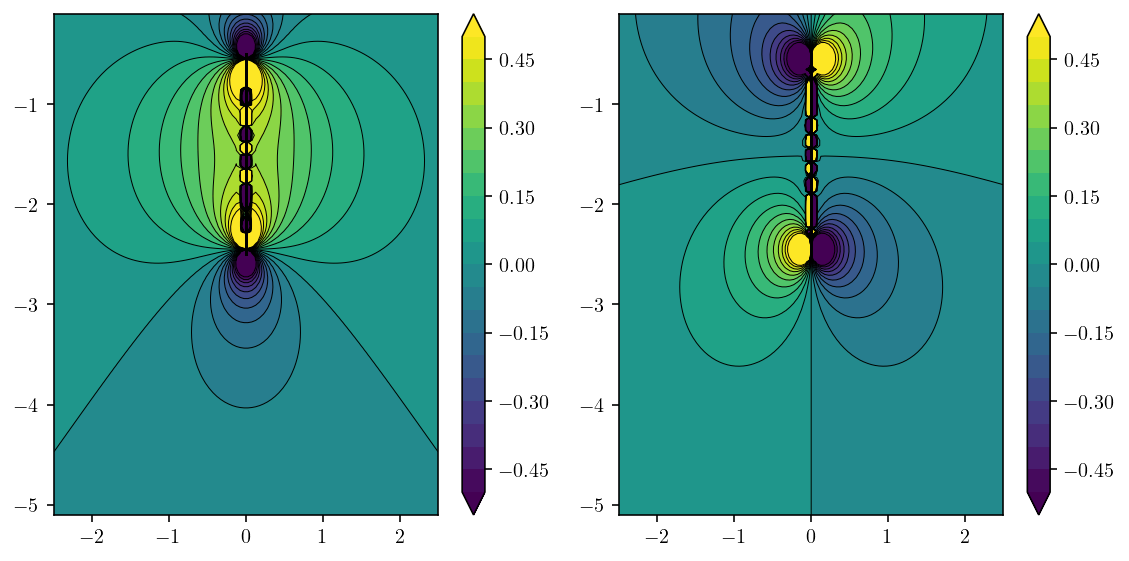

In [39]:
nobs = 100
zoomx = [-2.5, 2.5]
zoomy = [-5.1, -0.1]
xs = np.linspace(*zoomx, nobs)
ys = np.linspace(*zoomy, nobs)
obsx, obsy = np.meshgrid(xs, ys)

stress_flat = common.hypersingular_matrix(
    surface   = flat,
    obsx      = obsx.flatten(), 
    obsy      = obsy.flatten(),
    quad_rule = qr_flat
).dot(surf_disp).reshape((*obsx.shape, 2))
stress_fault = common.hypersingular_matrix(
    surface   = fault,
    obsx      = obsx.flatten(), 
    obsy      = obsy.flatten(),
    quad_rule = qr_fault
).dot(slip).reshape((*obsx.shape, 2))

stress_full = stress_flat + stress_fault

levels = np.linspace(-0.5, 0.5, 21)
plt.figure(figsize=(8, 4))
for d in range(2):
    plt.subplot(1, 2, 1 + d)
    cntf = plt.contourf(obsx, obsy, stress_full[:, :, d], levels=levels, extend="both")
    plt.contour(
        obsx,
        obsy,
        stress_full[:, :, d],
        colors="k",
        linestyles="-",
        linewidths=0.5,
        levels=levels,
        extend="both",
    )
    plt.plot(flat[0], flat[1], "k-", linewidth=1.5)
    plt.plot(fault[0], fault[1], "k-", linewidth=1.5)
    plt.colorbar(cntf)
    plt.xlim(zoomx)
    plt.ylim(zoomy)
plt.tight_layout()
plt.show()